<a href="https://colab.research.google.com/github/Valen-Nneji-007/pytorch-intro-/blob/main/02_neural_network_classification_with_pytorch_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 02. Neural Network classification with Neural
Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

## 1. Make classification dataand get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                  noise=0.03,
                  random_state = 42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n{X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
# Make a Dataframe of circle Data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


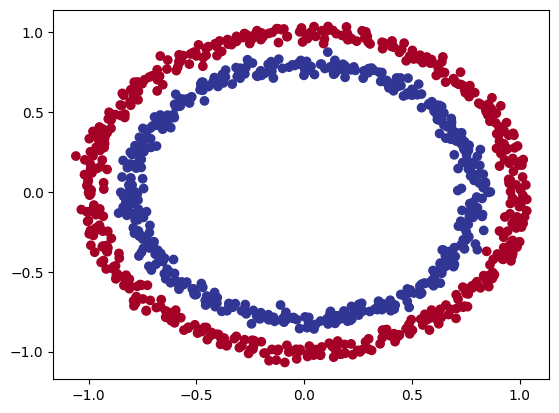

In [ ]:
# Visuaize, Visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x= X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: The data we are working with is often reffeered  to as a toy datasets that is small enough to experiment but still sizeable enough to practise the fundamental

### 1.1 check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# view the first examples of features and labels
X_sample = X[0]
y_sample= y[0]

print(f"Values for one sample of X: {X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.3.0+cu121'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2=20% of data wil be test & 80% will be trained
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# 2. Building a model
Lets build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostics code so ur code wil run on an accelarator(GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and Optimizer
4. Create a training and test loop

In [ ]:
# import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we have set up device agnostic code, let's creata a model that:

1. Subclass `nn.Module`(almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers athat are capable of handling the sahpes of our data
3. Defines a `forward()` method thatb outlines the forward pass (or forward compuatation) of the model
4. Instatiate an ainstance of our model class and send it to the targe `device`

In [ ]:
# 1. COnstruct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create  2 nn.Module layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputa a single feature  (same shape as y)


  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x-> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cpu'

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
 # let's replicate the model above using nn.sequential()
 model_0 = nn.Sequential(
     nn.Linear(in_features = 2, out_features=5),
     nn.Linear(in_features=5, out_features=1)
 ).to(device)

 model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5129, -0.6035],
                      [ 0.0662,  0.6370],
                      [-0.3875, -0.2390],
                      [ 0.0697, -0.5006],
                      [-0.4636,  0.1559]])),
             ('0.bias', tensor([ 0.2811,  0.6079,  0.5270, -0.1266, -0.1557])),
             ('1.weight',
              tensor([[-0.3814, -0.3647, -0.3618,  0.0888,  0.1015]])),
             ('1.bias', tensor([-0.1972]))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape:{X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 label: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape:torch.Size([200, 2])

First 10 predictions:
tensor([[-0.6606],
        [-0.6922],
        [-0.6768],
        [-0.6557],
        [-0.8338],
        [-0.8519],
        [-0.8163],
        [-0.8541],
        [-0.6701],
        [-0.6961]])

First 10 label: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## 2.1 setup Loss function and optimizer

Which loss function or optimizer should you use

Again... this is problem specific

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

For classification you might want binary cross entropy or categorical cross entropy(Croos entropy)

As a reminder, the loss function measure how wrong your predictions are.

ANd for optimizer, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For the loss function we are going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is.
* For a definition on what Logit is in deep learning
* For different optimizer see `torch.optim`

In [ ]:
# setup the loss function
# loss_fn = nn.BCELoss() #  BCELoss = requires inputs to have gone through the sigmond activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss =sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate Accuracy - out of 100 examples, what percentages does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc



## 3. Train model

To train our model, we are going to need to build a training loop with the folowing steps

1. Forward Pass
2. Calculate the Loss
3. Otimizer Zero grad
4. Loss Backward (Backpropagation)
5. Optimizer step (Gradient Descent)

### 3.1 Going fron raw logits -> prediction probabilities -> Prediction Labels

Our model outputs are going to be raw **Logits**

We can convert these **Logits** into prediction probabilities by passing them to some kind of activation function  (e.g sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [ ]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits =  model_0(X_test.to(device))[:5]
y_logits


tensor([[-0.6606],
        [-0.6922],
        [-0.6768],
        [-0.6557],
        [-0.8338]])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3406],
        [0.3335],
        [0.3370],
        [0.3417],
        [0.3028]])

For our predictions probabilities values, we need to perform a range -style rounding on them:

* `y_pred_probs`>=0.5, `y=1`(class 1)
* `y_pred_probs` <0.5, `y=0` (class 0)

In [ ]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# In Full (Logits -> pred probs -> pred_labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid extra dimenasion
y_preds.squeeze()


tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

## 3.2 Building a training and testing loop


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number epochs
epochs =100

# Put data to target device
X_train , y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and Evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward Pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> Pred label

  # 2. Calcualte loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
#y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expecting raw logits as input
                 y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3.  Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss Backward (Backpropagation)
  loss.backward()

  # 5. Optimizer Step (Gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits =  model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn (test_logits,
                         y_test)
    test_acc =  accuracy_fn(y_true=y_test,
                            y_pred=test_pred)

    # print out what is happening
    if epoch % 10 ==0:
      print(f"EPoch: {epoch} | Loss: {loss: 5f}, Acc: {acc: .2f}% |TestLoss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


EPoch: 0 | Loss:  0.761688, Acc:  50.00% |TestLoss: 0.75422, Test acc: 50.00%
EPoch: 10 | Loss:  0.718664, Acc:  50.00% |TestLoss: 0.71632, Test acc: 50.00%
EPoch: 20 | Loss:  0.703497, Acc:  50.00% |TestLoss: 0.70301, Test acc: 50.00%
EPoch: 30 | Loss:  0.697616, Acc:  50.00% |TestLoss: 0.69793, Test acc: 50.00%
EPoch: 40 | Loss:  0.695186, Acc:  50.00% |TestLoss: 0.69587, Test acc: 50.00%
EPoch: 50 | Loss:  0.694129, Acc:  41.38% |TestLoss: 0.69500, Test acc: 40.00%
EPoch: 60 | Loss:  0.693644, Acc:  48.12% |TestLoss: 0.69462, Test acc: 42.50%
EPoch: 70 | Loss:  0.693407, Acc:  49.38% |TestLoss: 0.69443, Test acc: 47.50%
EPoch: 80 | Loss:  0.693282, Acc:  48.75% |TestLoss: 0.69434, Test acc: 50.00%
EPoch: 90 | Loss:  0.693209, Acc:  48.88% |TestLoss: 0.69428, Test acc: 50.00%


## 4. Make predictions and evaluate the model

From the mtrics it looks like our model is not learning anyting

in other words, "Visualise, Visualize visualize"

To do so, we are going to import a function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

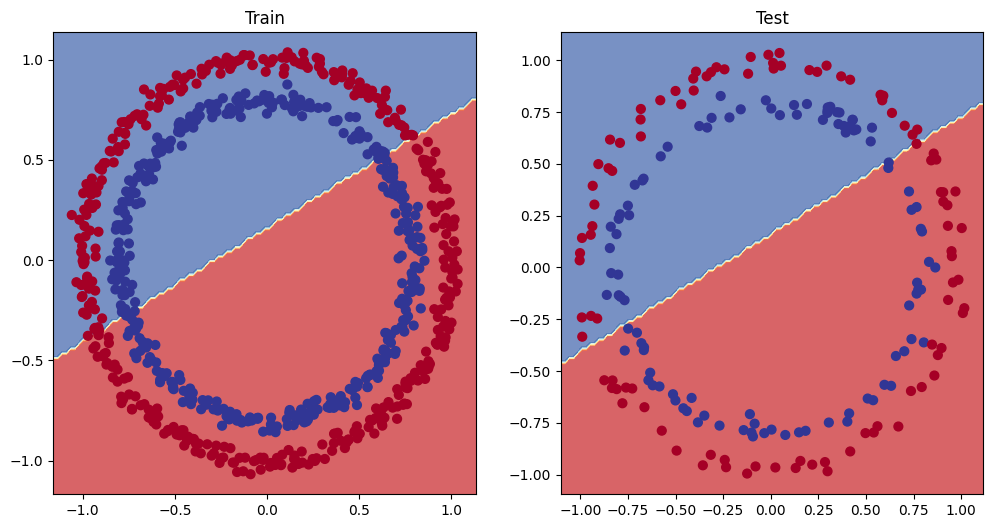

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0,X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about pattern s of the data

* Add more hidden units - go from 5 hidden units to 10 hidden units

* Fit for longer

* Changing the activation functions

* Change the Learning Rate

* Change the loss function

These options are all form a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we( as machine learning engineers and data scientists) can change, they are referred to as **Hyperparameters**

Let try and improve our model by:
* Adding more hidden units: 5->10
* Increase the number of layers: 2-> 3
* Increase the number of epochs: 100 -> 1000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features = 10)
    self.layer_3 = nn.Linear(in_features =10, out_features = 1)

  def forward(self, x):
    #  z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))  # this way of writing operation leveraging speedup where possible behind the scene

model_1  = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a function loss
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr= 0.1)



In [ ]:
# Write a training loop and a test loop(evaluation loop) for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for Longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. FOrward Pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Logits -> pred probabilities -> pred prediction

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizerzero grad
  optimizer.zero_grad()

  # 4. Loss Backward( Backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate Loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


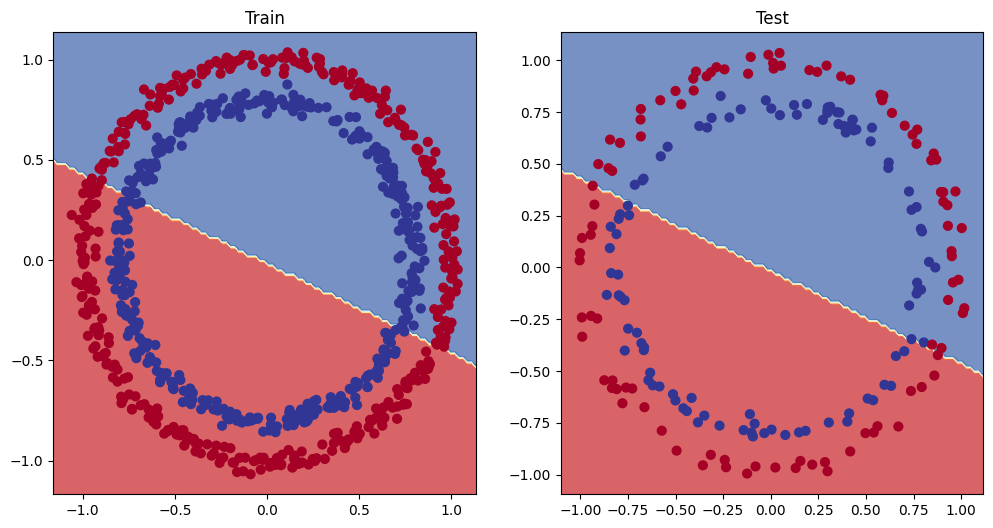

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1,X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a Larger problem is to test out a smaller problem

In [ ]:
# Create some data (same as notebook 01)

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

# create data
X_regression = torch.arange(start, end , step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formular ( without epilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# CHeck the lenghts of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

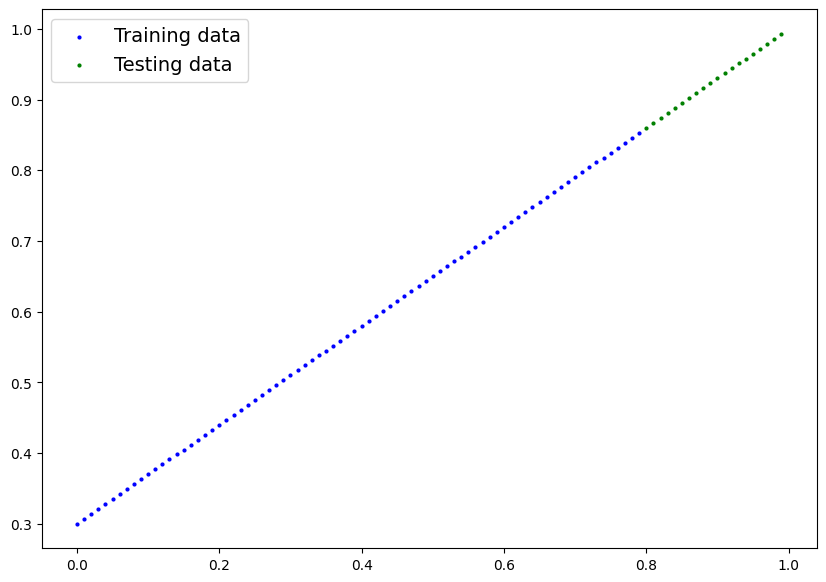

In [ ]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression);

### 5.2 Adjusting `model_1` to fit a striaght line

In [ ]:
# same architecture as model_1 (but using nn.sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss nd optimizer
loss_fn =  nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)


In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put that data on the target device
X_train_regression,  y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

#Training
for epoch in range(epochs):
  y_pred=model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what is happening
  if epoch % 100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}  | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986  | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858  | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533  | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137  | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964  | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940  | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903  | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878  | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840  | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798  | Test Loss: 0.00360


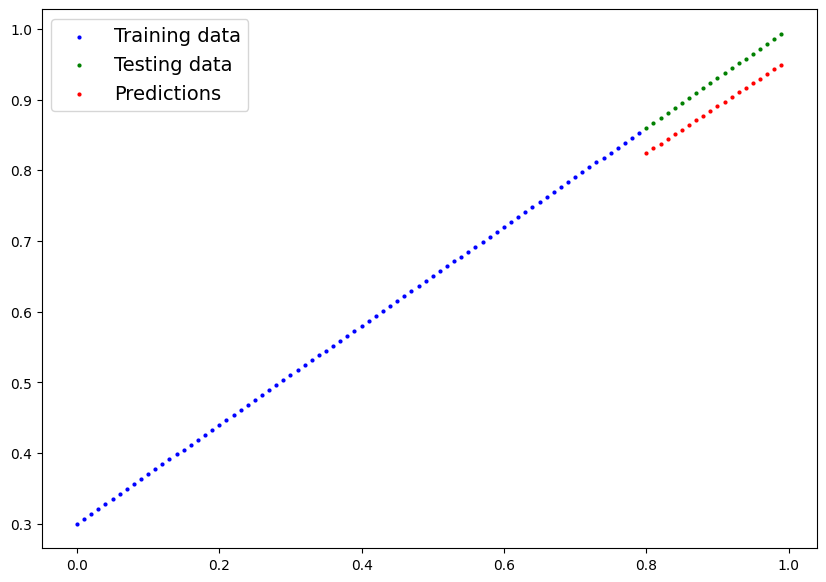

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make Predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 predictions =y_preds.cpu());

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of straight and non straight line?"

Or in machine learning terms, an infinte (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data(red and blue circles)

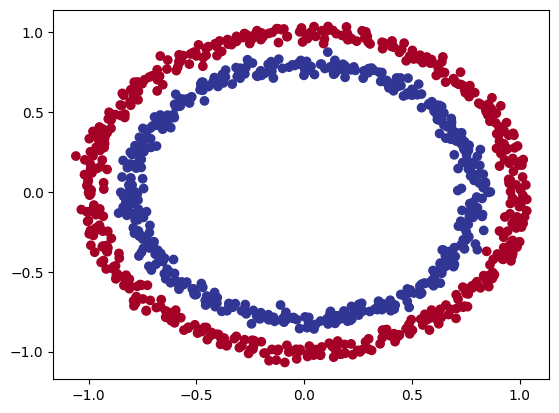

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples =1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state =42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# COnvert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

# Turn data into tensor
X = torch.from_numpy(X).type(torch.float)
y =torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=42)

X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-Linearity

* Linear =  Straight Lines

* Non-linear =  Non-straight Lines

Artificial neural networks are a large combination of linear (straight) and non-straight(non-linear) functions which are potentially able to find patterns in the data

In [ ]:
# Build a model with non-linear activation functiona
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features= 1)
    self.relu = nn.ReLU()  # Relu is a non-Linear activation function

  def forward(self, x):
    #Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Set up loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr =0.1)


### 6.3 Training a model with non-Linearity

In [ ]:
#Random Seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target davice
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test =  X_test.to(device), y_test.to(device)

# Loop through data
epochs = 10000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred =  torch.round(torch.sigmoid(y_logits)) # logits -> Prediciton probabilities

  # 2. Calculate the Loss
  loss = loss_fn(y_logits, y_train) # BECWithLogitsLoss ( Takes in logits as first input)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. loss Backward pass (Backpropagation)
  loss.backward()

  # 5.  Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what is happening
    if epoch % 1000 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f} Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")







Epoch: 0 | Loss: 0.6929 Acc: 50.00% | Test Loss: 0.6932, Test Acc: 50.00%
Epoch: 1000 | Loss: 0.5682 Acc: 87.75% | Test Loss: 0.5738, Test Acc: 86.50%
Epoch: 2000 | Loss: 0.0418 Acc: 99.88% | Test Loss: 0.0658, Test Acc: 100.00%
Epoch: 3000 | Loss: 0.0167 Acc: 99.88% | Test Loss: 0.0336, Test Acc: 100.00%
Epoch: 4000 | Loss: 0.0105 Acc: 100.00% | Test Loss: 0.0245, Test Acc: 99.50%
Epoch: 5000 | Loss: 0.0077 Acc: 100.00% | Test Loss: 0.0199, Test Acc: 99.50%
Epoch: 6000 | Loss: 0.0060 Acc: 100.00% | Test Loss: 0.0173, Test Acc: 99.50%
Epoch: 7000 | Loss: 0.0050 Acc: 100.00% | Test Loss: 0.0156, Test Acc: 99.50%
Epoch: 8000 | Loss: 0.0043 Acc: 100.00% | Test Loss: 0.0145, Test Acc: 99.50%
Epoch: 9000 | Loss: 0.0037 Acc: 100.00% | Test Loss: 0.0137, Test Acc: 99.50%


### 6.4 Evaluation a model trained with non-linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds =torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

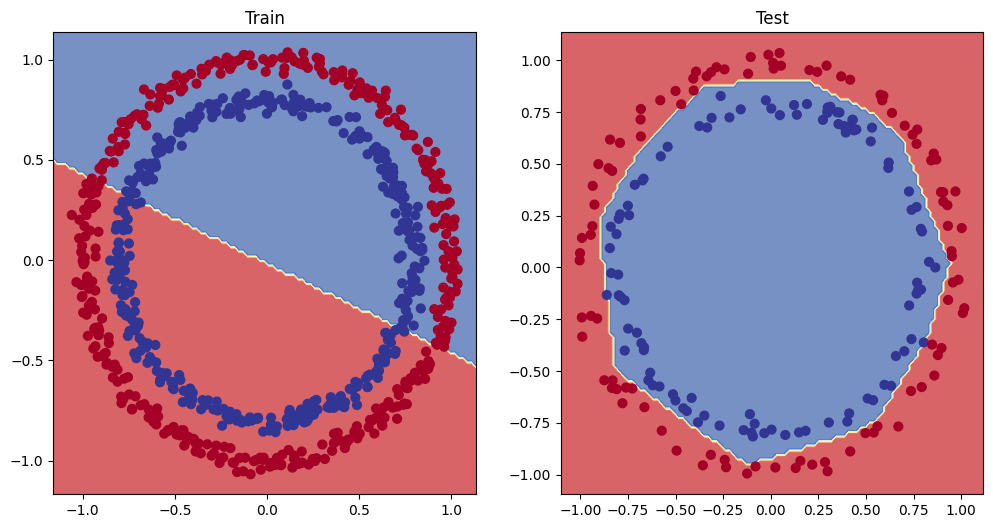

In [ ]:
#Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own

And these are tools are linear and non-linear functions


In [ ]:
# create a tensor
A =  torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

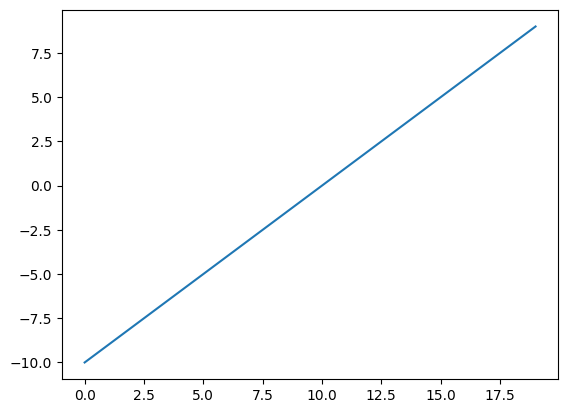

In [ ]:
# Visualize the tensor
plt.plot(A);

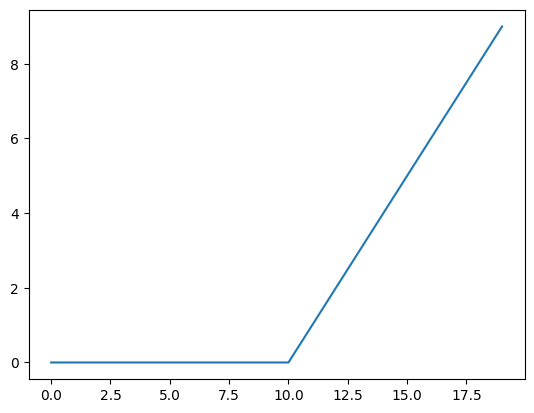

In [ ]:
plt.plot(torch.relu(A));

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

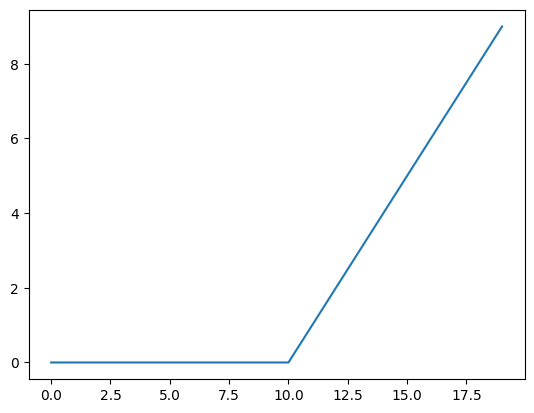

In [ ]:
# Plot ReLU activation function
plt.plot(relu(A));

In [ ]:
# Now let's do the same for sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

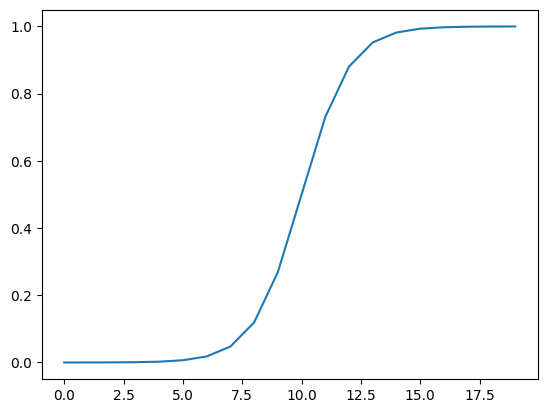

In [ ]:
plt.plot(torch.sigmoid(A));

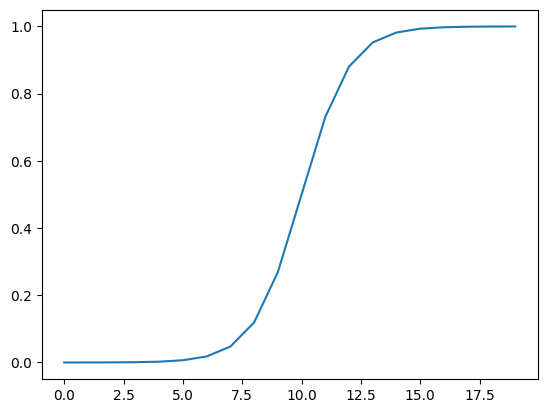

In [ ]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a multi class sclassification problem

* Binary Classifcation = one thing or another

* Multi-Class Classification = More than one thing or another


### 8.1 Creating a toy multi-class datasets

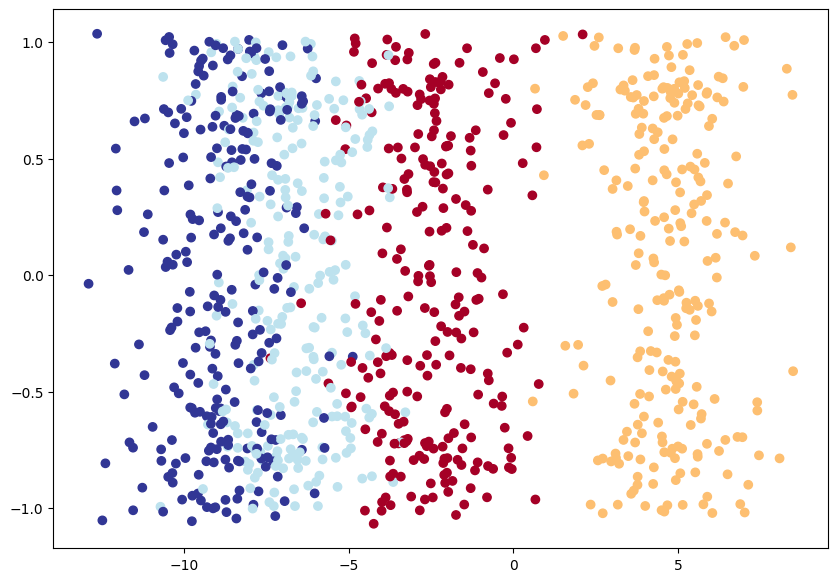

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob =  make_blobs(n_samples =1000,
                             n_features = NUM_FEATURES,
                             centers = NUM_CLASSES,
                             cluster_std = 1.5, # give the clusters a little shake up
                             random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state =RANDOM_SEED)

# 4. Plot data ( Visualise, Visualize , visualize)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);


### 8.2 Building a multi-class classification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      Input_features(int): Number of input features to the model
      Output_features (int): Number of output features ( Number of output)
      hidden_units (int): Number of hidden units between layers, default 8

    Return:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features =2,
                    output_features = 4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train.shape[:5]

(torch.Size([800, 2]), torch.Size([800]))

### 8.3 Create a loss function and a optimizer for a multiclass classification model


In [ ]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an Optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

### 8.4 Getting prediction probabilities for a multi-class PyTorch Model

In order to evaluate and train and test our model, we need to convert our model's output (logits) to prediction probabilities and then to prediction labels

Logits (raw outpu of the model) -> Pred probs (Use `torch.softmax`)-> pred labels ( take the argmax of the prediction probabilities)

In [ ]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# COnvert our model's logit output to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [ ]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Se the number of epochs
epochs =100

# Put the data to the target device
X_blob_train = X_blob_train.to(device)
y_blob_train = y_blob_train.to(device)
X_blob_test =  X_blob_test.to(device)
y_blob_test = y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Train
  model_4.train()

  ### Forward Pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  ## Calculate the Loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred =y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits =  model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

  # Print out what is happening
  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 1.1588, Acc: 40.38% | Test Loss: 1.0755, Test acc: 23.00%
Epoch: 10 | Loss: 0.6448, Acc: 96.75% | Test Loss: 0.6607, Test acc: 23.00%
Epoch: 20 | Loss: 0.4254, Acc: 98.50% | Test Loss: 0.4307, Test acc: 23.00%
Epoch: 30 | Loss: 0.2529, Acc: 99.12% | Test Loss: 0.2451, Test acc: 23.00%
Epoch: 40 | Loss: 0.1123, Acc: 99.25% | Test Loss: 0.1023, Test acc: 23.00%
Epoch: 50 | Loss: 0.0663, Acc: 99.25% | Test Loss: 0.0585, Test acc: 23.00%
Epoch: 60 | Loss: 0.0507, Acc: 99.25% | Test Loss: 0.0429, Test acc: 23.00%
Epoch: 70 | Loss: 0.0430, Acc: 99.25% | Test Loss: 0.0349, Test acc: 23.00%
Epoch: 80 | Loss: 0.0384, Acc: 99.25% | Test Loss: 0.0299, Test acc: 23.00%
Epoch: 90 | Loss: 0.0352, Acc: 99.25% | Test Loss: 0.0266, Test acc: 23.00%


### 8.6 Making and evaluating predictngs with a PyTorch multi-class model

In [ ]:
# Make prediction
model_4.eval()
with torch.inference_mode():
  y_logits =model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [ ]:
# Go from logits -> prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [ ]:
# Go from pred probs to pred labels
y_preds =  torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

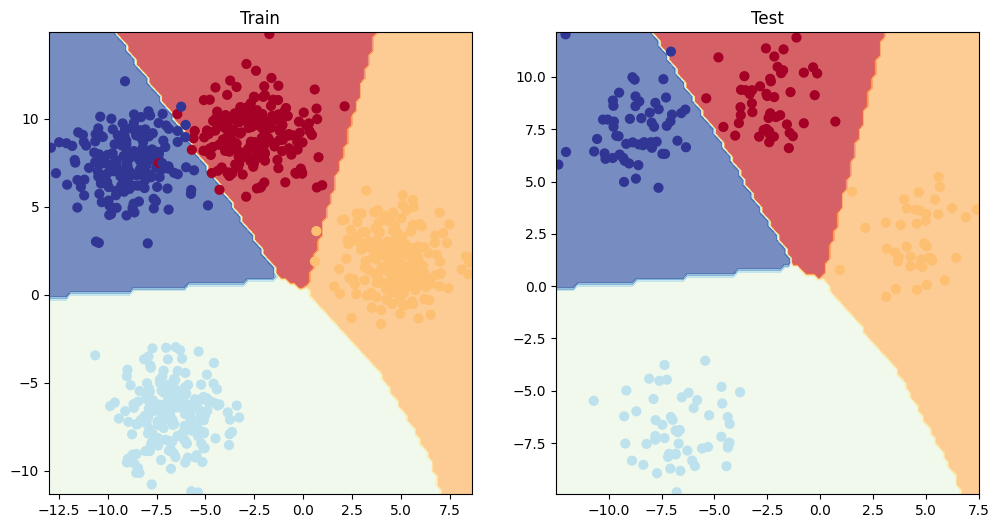

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 9. A few more classification metrics... ( to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* F1-score
* Confusion matrix
* Classification report


In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy().to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

TypeError: Accuracy.__new__() missing 1 required positional argument: 'task'